In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from IPython.display import Image,display
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [116]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [117]:
import missingno

In [118]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
#creating a dataframe that will help us khowing our dataset better
train_data_dict=pd.DataFrame(train.dtypes,columns=['dtypes'])
train_data_dict['Missing_val']=train.isnull().sum()
train_data_dict['Unique_val']=train.nunique()
train_data_dict['Count']=train.count()
train_data_dict

,dtypes,Missing_val,Unique_val,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [122]:
train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Artagaveytia, Mr. Ramon",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [124]:
#the % of survived and unsurvived people
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [125]:
#the % of gender
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

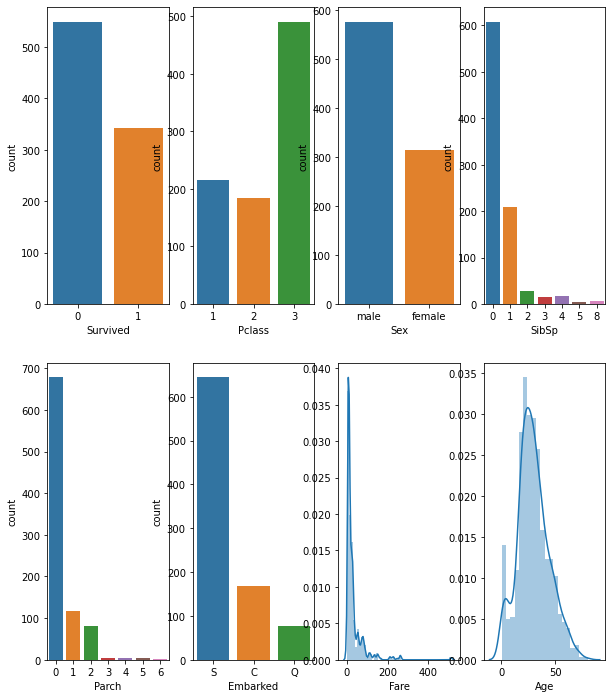

In [126]:
#visualizing our data
fig,axes=plt.subplots(2,4,figsize=(10,12))
sns.countplot('Survived',data=train,ax=axes[0,0])
sns.countplot('Pclass',data=train,ax=axes[0,1])
sns.countplot('Sex',data=train,ax=axes[0,2])
sns.countplot('SibSp',data=train,ax=axes[0,3])
sns.countplot('Parch',data=train,ax=axes[1,0])
sns.countplot('Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'].dropna(),kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

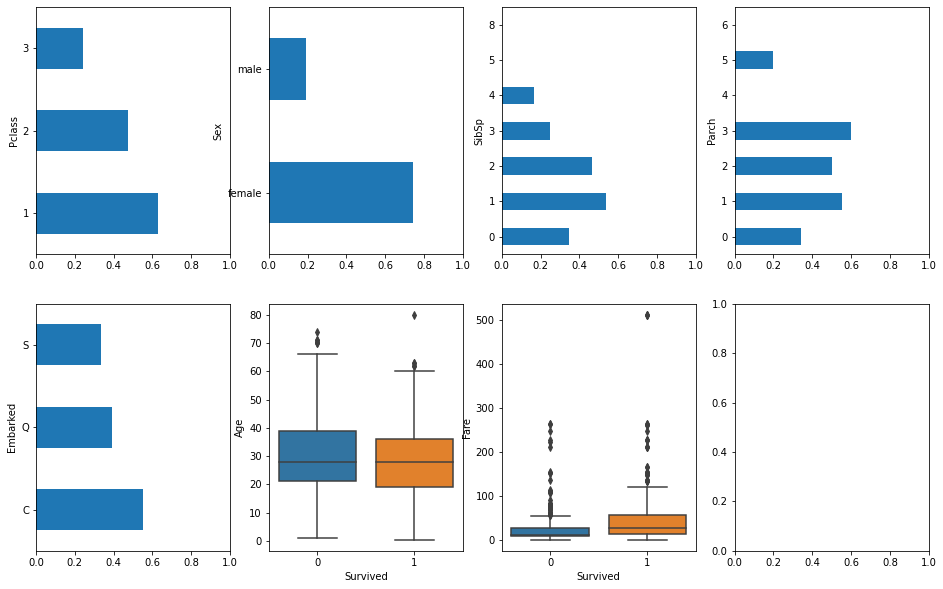

In [127]:
#visualizing the relationship between every feature with the servived feature which is the goal
figbi,axesbi=plt.subplots(2, 4,figsize=(16,10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x='Survived',y='Age',data=train,ax=axesbi[1,1])
sns.boxplot(x='Survived',y='Fare',data=train,ax=axesbi[1,2])

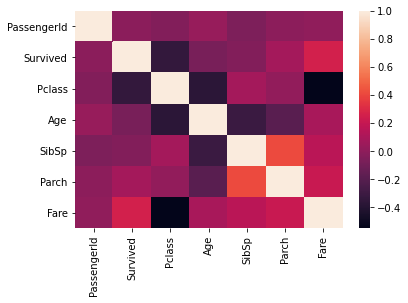

In [128]:
#correlation between features
corr=train.corr()
sns.heatmap(corr)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
#extracting the title from name which may help us
train['title']=train.Name.str.extract('\, ([A-Z][^ ]*\.)')
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Mlle.,2
7,Col.,2
8,Major.,2
9,Lady.,1


In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


Start cleaning our data

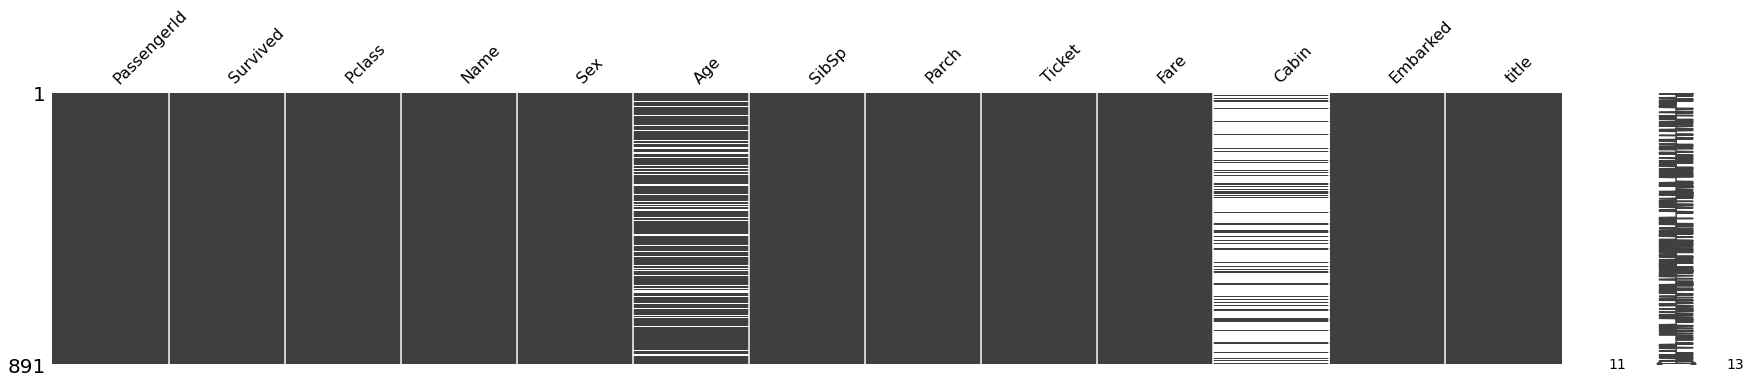

In [132]:
#this function helps ut to visualize the null value in each column
missingno.matrix(train,figsize=(30,5))

In [133]:
train_data_dict

,dtypes,Missing_val,Unique_val,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [134]:
#first cleaning issue:setting passenger_id as the index
train= train.set_index('PassengerId')

In [135]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [136]:
#checking if we have zero values in fare
print((train['Fare']==0).sum())

15


In [137]:
#changing zeros to null
train.Fare=train.Fare.replace(0,np.NAN)

In [138]:
train.Fare.isnull().sum()

15

In [139]:
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S,Mr.
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S,Mr.
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S,Mr.
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S,Mr.
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S,Mr.
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S,Mr.
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S,Mr.
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S,Mr.
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S,Mr.


Filling the Fare null values with respect to Pclass

In [140]:
train.groupby(train.Pclass).Fare.median()

Pclass
1    61.9792
2    15.0229
3     8.0500
Name: Fare, dtype: float64

In [141]:
p1_med=train.groupby(train.Pclass).Fare.median()[1]
p2_med=train.groupby(train.Pclass).Fare.median()[2]
p3_med=train.groupby(train.Pclass).Fare.median()[3]

In [142]:
p1_med

61.9792

In [143]:
p2_med

15.0229

In [144]:
p3_med

8.05

In [145]:
#Fare null values with respect to Pclass1
train_p1=pd.DataFrame(train[train.Pclass==1])

In [146]:
#Fare null values with respect to Pclass2
train_p2=pd.DataFrame(train[train.Pclass==2])

In [147]:
#Fare null values with respect to Pclass3
train_p3=pd.DataFrame(train[train.Pclass==3])

In [148]:
#Filling fare null values with respect to Pclass1
train_p1.Fare.fillna(train_p1.Fare.median(),inplace=True)

In [149]:
#Filling fare null values with respect to Pclass3
train_p2.Fare.fillna(train_p2.Fare.median(),inplace=True)

In [150]:
#Filling fare null values with respect to Pclass3
train_p3.Fare.fillna(train_p3.Fare.median(),inplace=True)

In [151]:
#checking if fare still has null values
train_p1[train_p1.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,


In [152]:
#checking if fare still has null values
train_p2[train_p2.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,


In [153]:
#checking if fare still has null values
train_p3[train_p3.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,


In [154]:
train=pd.concat([train_p1,train_p2,train_p3])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss.
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr.


In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 2 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  title     890 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [156]:
train.sort_index(inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [157]:
#checking if age has zero values
print((train.Age==0).sum())

0


In [158]:
train['Age'].fillna((train['Age'].mean()),inplace=True)

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  title     890 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [160]:
train.Cabin.isnull().mean()

0.7710437710437711

In [161]:
#Droping the cabin feature because it has alot of null values 
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title'],
      dtype='object')

In [162]:
#Droping the cabin feature because it has alot of null values 
trainML=train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'title']]

In [163]:
trainML.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [164]:
trainML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  title     890 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [165]:
#droping the row that contain a title null value
trainML=trainML.dropna()

In [166]:
#train data is all cleaned
trainML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Name      888 non-null    object 
 3   Sex       888 non-null    object 
 4   Age       888 non-null    float64
 5   SibSp     888 non-null    int64  
 6   Parch     888 non-null    int64  
 7   Ticket    888 non-null    object 
 8   Fare      888 non-null    float64
 9   Embarked  888 non-null    object 
 10  title     888 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.2+ KB


Doing the same with test data

In [167]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [169]:
test.describe(include='number')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [170]:
test.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


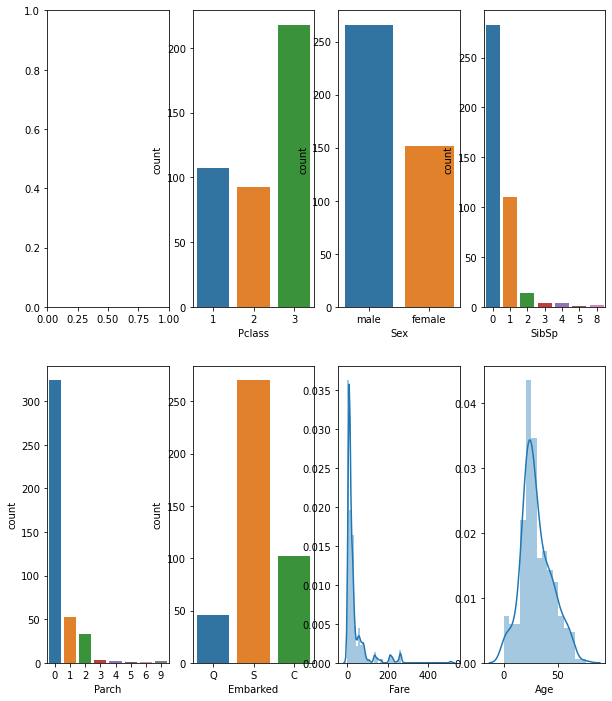

In [171]:
fig,axes=plt.subplots(2,4,figsize=(10,12))
sns.countplot('Pclass',data=test,ax=axes[0,1])
sns.countplot('Sex',data=test,ax=axes[0,2])
sns.countplot('SibSp',data=test,ax=axes[0,3])
sns.countplot('Parch',data=test,ax=axes[1,0])
sns.countplot('Embarked',data=test,ax=axes[1,1])
sns.distplot(test['Fare'].dropna(),kde=True,ax=axes[1,2])
sns.distplot(test['Age'].dropna(),kde=True,ax=axes[1,3])

cleaning the test data

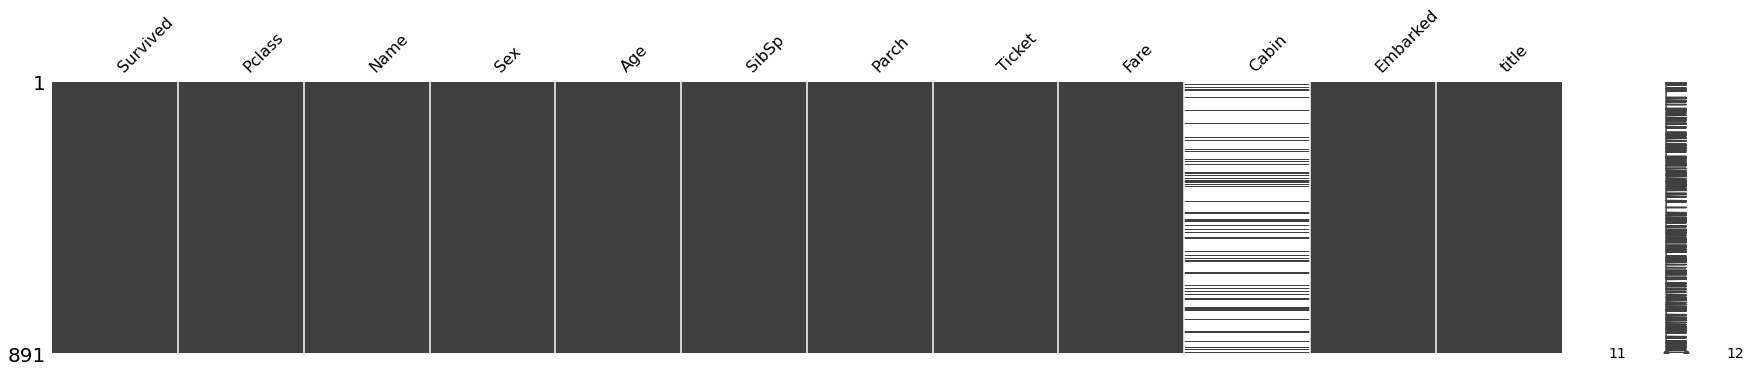

In [172]:
#this function helps ut to visualize the null value in each column
missingno.matrix(train,figsize=(30,5))

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [174]:
print((test.Age==0).sum())

0


In [175]:
test.Age.isnull().sum()

86

In [176]:
test['Age'].fillna((test['Age'].mean()),inplace=True)

In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [178]:
print((test.Fare==0).sum())

2


In [179]:
test.Fare=test.Fare.replace(0,np.NAN)

In [180]:
test.Fare.isnull().sum()

3

In [181]:
test=test.set_index('PassengerId')

In [182]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [183]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [184]:
testML=test[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Embarked']]

In [185]:
testML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      415 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


In [186]:
testML=testML.dropna()

In [187]:
testML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    415 non-null    int64  
 1   Name      415 non-null    object 
 2   Sex       415 non-null    object 
 3   Age       415 non-null    float64
 4   SibSp     415 non-null    int64  
 5   Parch     415 non-null    int64  
 6   Ticket    415 non-null    object 
 7   Fare      415 non-null    float64
 8   Embarked  415 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.4+ KB


In [188]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [189]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values

In [190]:
X_Age

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [191]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [192]:
#Training the model 
lr.fit(X_Age,y)

#Making a prediction
y_predict = lr.predict(X_Age)
(y == y_predict).mean()

0.6182432432432432

In [193]:
X_Fare = trainML[['Fare']].values

lr.fit(X_Fare,y)

y_predict = lr.predict(X_Fare)
(y == y_predict).mean()

0.6621621621621622

In [194]:
X_sex = pd.get_dummies(trainML['Sex']).values
lr.fit(X_sex,y)

y_predict = lr.predict(X_sex)
(y == y_predict).mean()

0.786036036036036

In [195]:
from sklearn.ensemble import RandomForestClassifier 

X = trainML[['Age','SibSp','Parch','Fare']].values

RF = RandomForestClassifier()

RF.fit(X,y)

y_predict = RF.predict(X)
(y == y_predict).mean()

0.9572072072072072